# UK E-Commerce Data

##### 이커머스 소비자 데이터를 마케팅적 측면에서 분석하고, 소비자별 상품을 추천해주는 것을 목표로함.

## 1. 데이터 파악 및 전처리


--Requirements--

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_white"

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data.csv', encoding = 'ISO-8859-1', dtype={'CustomerID' : str})
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [5]:
df.shape

(541909, 8)

- CustomerID의 dtype을 str으로 변환
- InvoiceDate의 dtype을 datetime으로 변환

## 중복값 확인

In [6]:
df.duplicated().sum()

5268

- 완전히 동일한 경우만 제외

In [7]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
len(df)

536641

## 결측치 확인

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

- 고객ID와 Description값이 Null인 건 모두 drop

In [9]:
import copy
df_og = df.copy()
print('Before drop:',len(df))
df = df.dropna(subset=['CustomerID','Description'])
print('After drop:',len(df))

Before drop: 536641
After drop: 401604


In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 컬럼별 데이터 확인
- InvoiceNo : 거래 고유 번호
- StockCode : 상품 고유 번호
- Description : 상품명
- Quantity : 거래 수량
- InvoiceDate : 거래 일시
- UnitPrice : 상품 단가
- CustomerID : 구매자 고유 번호
- Country : 구매 국가

## InvoiceNo, CustomerID
------

In [11]:
pd.DataFrame([{
    'products' : len(df['StockCode'].value_counts()),
    'transactions' : len(df['InvoiceNo'].value_counts()),
    'customers' : len(df['CustomerID'].value_counts())
}], columns=['products','transactions','customers'], index=['quantity'])

,products,transactions,customers
quantity,3684,22190,4372


- 여기서 cutomers는 nan값 가진 cutomers제외한 값
- products는 StockCode로 정의

## StockCode
------

In [12]:
sorted(df['StockCode'].unique(), reverse=True)

['POST',
 'PADS',
 'M',
 'DOT',
 'D',
 'CRUK',
 'C2',
 'BANK CHARGES',
 '90214Z',
 '90214Y',
 '90214W',
 '90214V',
 '90214U',
 '90214T',
 '90214S',
 '90214R',
 '90214P',
 '90214O',
 '90214N',
 '90214M',
 '90214L',
 '90214K',
 '90214J',
 '90214I',
 '90214H',
 '90214G',
 '90214F',
 '90214E',
 '90214D',
 '90214C',
 '90214B',
 '90214A',
 '90212C',
 '90212B',
 '90211B',
 '90211A',
 '90210D',
 '90210C',
 '90210B',
 '90210A',
 '90209C',
 '90209B',
 '90209A',
 '90208',
 '90206C',
 '90206A',
 '90205C',
 '90205A',
 '90204',
 '90202D',
 '90202C',
 '90202B',
 '90202A',
 '90201D',
 '90201C',
 '90201B',
 '90201A',
 '90200E',
 '90200D',
 '90200C',
 '90200B',
 '90200A',
 '90199D',
 '90199C',
 '90199B',
 '90199A',
 '90198B',
 '90198A',
 '90197B',
 '90196B',
 '90196A',
 '90195B',
 '90195A',
 '90194',
 '90192',
 '90191',
 '90190C',
 '90190B',
 '90190A',
 '90189A',
 '90188',
 '90187B',
 '90186B',
 '90186A',
 '90185D',
 '90185C',
 '90185B',
 '90185A',
 '90184C',
 '90184B',
 '90184A',
 '90183C',
 '90183A',


In [13]:
stock_list = ['POST','PADS','M','DOT','D','CRUK','C2','BANK CHARGES']
tmp = df[df['StockCode'].isin(stock_list)]
tmp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands
1098,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany
1387,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911,EIRE
...,...,...,...,...,...,...,...,...
535955,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518,Germany
536280,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
536462,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662,Germany
536499,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526,Germany


- Post : 배송(해외 고객)
- Pad : 쿠션 패드
- M : Manual
- Dot : dotcom postage
- CRUK : 특정 단체에 내는 Commission이라고 추정
- C2 : Carriage

### 매출과 관련없는 StockCode행 삭제
----

In [14]:
drop_sc_list = ['POST','DOT','D','CRUK','C2','BANK CHARGES']
drop_sc_idx = df[df['StockCode'].isin(drop_sc_list)].index
print('Before drop:',len(df))
df.drop(drop_sc_idx, inplace=True)
print('After drop:',len(df))

Before drop: 401604
After drop: 400153


### StockCode와 Description맞추기
-----

#### 같은 StockCode인데 describe명이 다른 경우가 많다.
- ex) 'SET 12 COLOURING PENCILS DOILY', 'SET 12 COLOUR PENCILS DOILEY', 'SET 12 COLOURING PENCILS DOILEY'
- 'DOILEY STORAGE TIN', 'DOILEY BISCUIT TIN',  'STORAGE TIN VINTAGE DOILY ', 'STORAGE TIN VINTAGE DOILEY 
- 'RETRO LEAVES MAGNETIC NOTEPAD', 'RETO LEAVES MAGNETIC SHOPPING LIST'  'LEAVES MAGNETIC  SHOPPING LIST', 'VINTAGE LEAF MAGNETIC NOTEPAD''

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [16]:
# 중복되는 행들
duplicated_rows = df[df.duplicated('StockCode', keep=False)]

# 중복되는 첫 번째 행의 값을 가져옴
first_duplicated_values = duplicated_rows.drop_duplicates('StockCode').set_index('StockCode')

# 중복되는 행들의 인덱스를 가져옴
duplicated_indices = duplicated_rows.index

# 중복되는 행들의 '특정 컬럼'을 첫 번째 중복 행의 값으로 채움
df.loc[duplicated_indices, 'Description'] = df.loc[duplicated_indices, 'StockCode'].map(first_duplicated_values['Description'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [17]:
sc_description = df.groupby('StockCode')['Description'].nunique().reset_index()
sc_description['Description'].unique()

array([1], dtype=int64)

- StockCode컬럼은 삭제

### 가장 많이 판매된 제품 상위 20

In [18]:
popular_pdt = pd.DataFrame(df.groupby(['Description'])['Quantity'].sum()).reset_index()
popular_pdt.sort_values(by='Quantity', ascending=False, inplace=True)

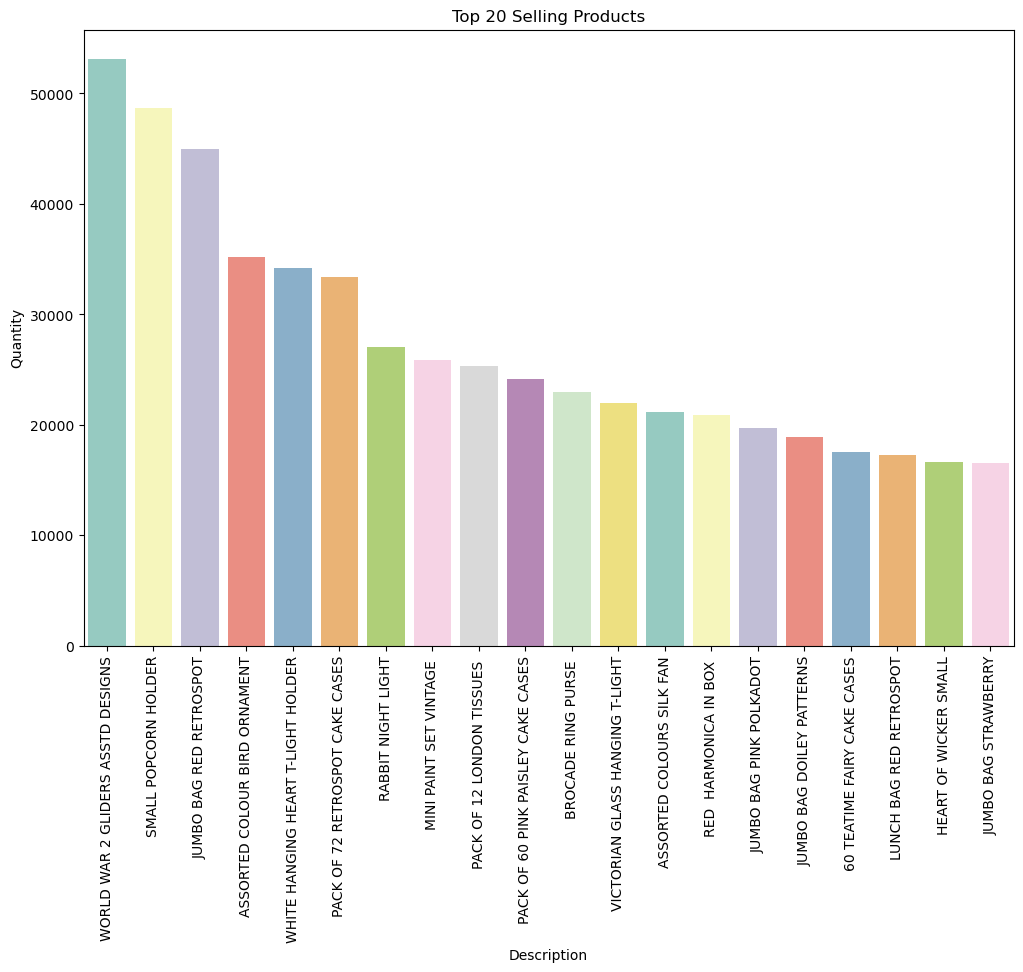

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Description', y='Quantity', data=popular_pdt[0:20], palette='Set3')
plt.title('Top 20 Selling Products')
plt.xlabel('Description')
plt.xticks(rotation=90)
plt.show()

## PRICE, QUANTITY

------

#### 수량 및 가격 최소/최대값

In [20]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,400153.000000,400153.000000
mean,12.222570,3.292688
std,250.732565,67.002464
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


- 수량의 최소값은 -80995, 최대는 80995
- 가격의 최소값은 0, 최대는 38970

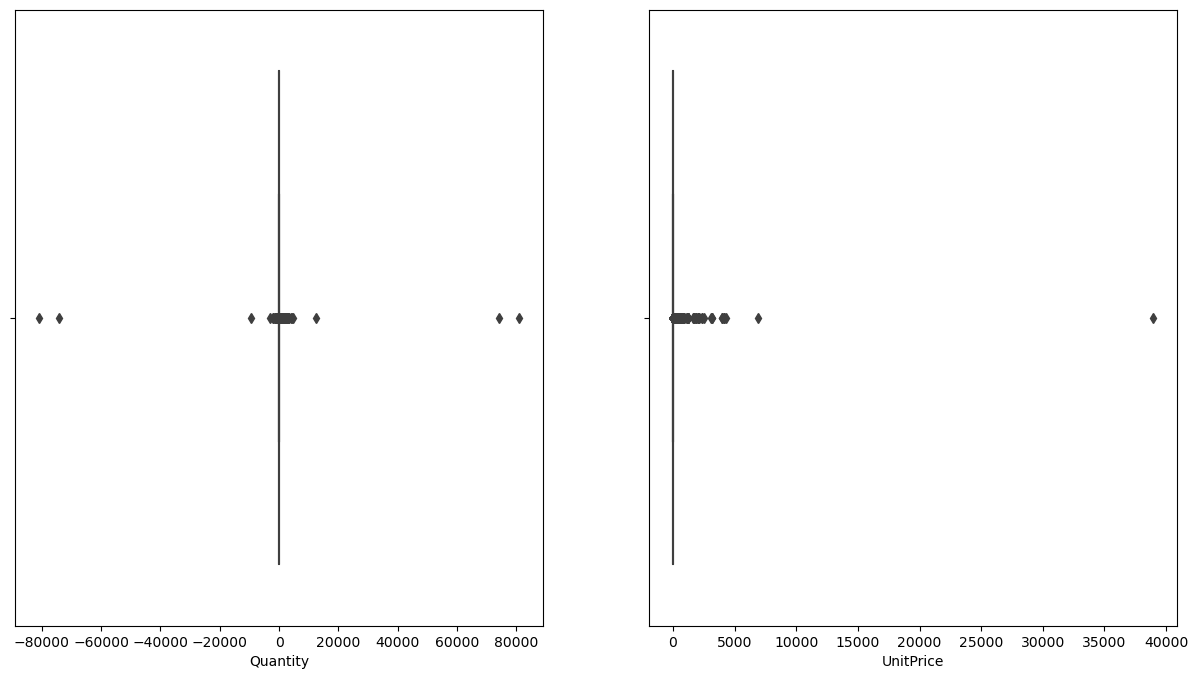

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.boxplot(x = df['Quantity'], ax=ax[0])
sns.boxplot(x = df['UnitPrice'], ax=ax[1]);

#### (-)수량은 어떤 의미?

In [22]:
df[(df['Quantity'] == -9360) | (df['Quantity'] == 9360)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4226,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom


In [23]:
df.sort_values(by='Quantity', ascending=True).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
535161,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom
61011,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
4226,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom
158702,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749,United Kingdom
158701,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749,United Kingdom


### iqr Outlier개수 확인

In [24]:
df_iqr = df.copy()
quartile1 = df_iqr['Quantity'].quantile(0.25)
quartile3 = df_iqr['Quantity'].quantile(0.75)
iqr = quartile3 - quartile1

up_limit = quartile3 + 1.5 * iqr
low_limit = quartile1 - 1.5 * iqr

low = df_iqr.loc[df_iqr['Quantity'] < low_limit, 'Quantity']
up = df_iqr.loc[df_iqr['Quantity'] > up_limit, 'Quantity']
print('up_limit', up_limit)
print('low_limit', low_limit)
print('#.up', up.nunique())
print('#.low', low.nunique())

up_limit 27.0
low_limit -13.0
#.up 275
#.low 121


- InvoiceNo에 C가 붙으면 Cancel된 상품?
- 취소 수량을 어떻게 처리해야할지 고민해보기

### Total BIlls 컬럼 생성

In [25]:
df['Total_bills'] = df['Quantity'] * df['UnitPrice']
drop_idx = df[df['Total_bills']==0].index
df.drop(drop_idx, inplace=True)
df[df['Total_bills']<1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_bills
114,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
127,536381,22261,FELT EGG COSY WHITE RABBIT,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
128,536381,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
...,...,...,...,...,...,...,...,...,...
536572,581580,21803,CHRISTMAS TREE STAR DECORATION,2,2011-12-09 12:20:00,0.42,12748,United Kingdom,0.84
536573,581580,21809,CHRISTMAS HANGING TREE WITH BELL,2,2011-12-09 12:20:00,0.39,12748,United Kingdom,0.78
536574,581580,20974,12 PENCILS SMALL TUBE SKULL,1,2011-12-09 12:20:00,0.65,12748,United Kingdom,0.65
536578,581580,22695,WICKER WREATH SMALL,1,2011-12-09 12:20:00,0.59,12748,United Kingdom,0.59


### Price Outlier 값 확인

In [26]:
price_max = df.sort_values(by='UnitPrice', ascending=False)
price_max[(price_max['Description'] == 'Manual') & (price_max['StockCode'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_bills


In [27]:
df[df['CustomerID']=='15098']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_bills
220815,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0
220825,556444,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
220826,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom,-38970.0
220827,556446,22502,PICNIC BASKET WICKER SMALL,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5
220837,C556448,22502,PICNIC BASKET WICKER SMALL,-60,2011-06-10 15:39:00,4.95,15098,United Kingdom,-297.0


- 
- Outlier을 어떻게 처리할지? --> 결국 취소건을 어떻게 처리할지의 문제
- IQR Method?& 평균값으로 대체? or Cancel 건 drop?

### Transaction_Status컬럼 생성
- 송장 번호 앞에 C가 붙은 건은 Cancel, 아니면 Complete 컬럼 생성

In [28]:
total_transactions = df.groupby(['CustomerID'])['InvoiceNo'].nunique().reset_index()
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Completed


### 지역
----

In [29]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

### 영국을 제외한 판매금액 높은 국가 Top 20

<Axes: xlabel='Country'>

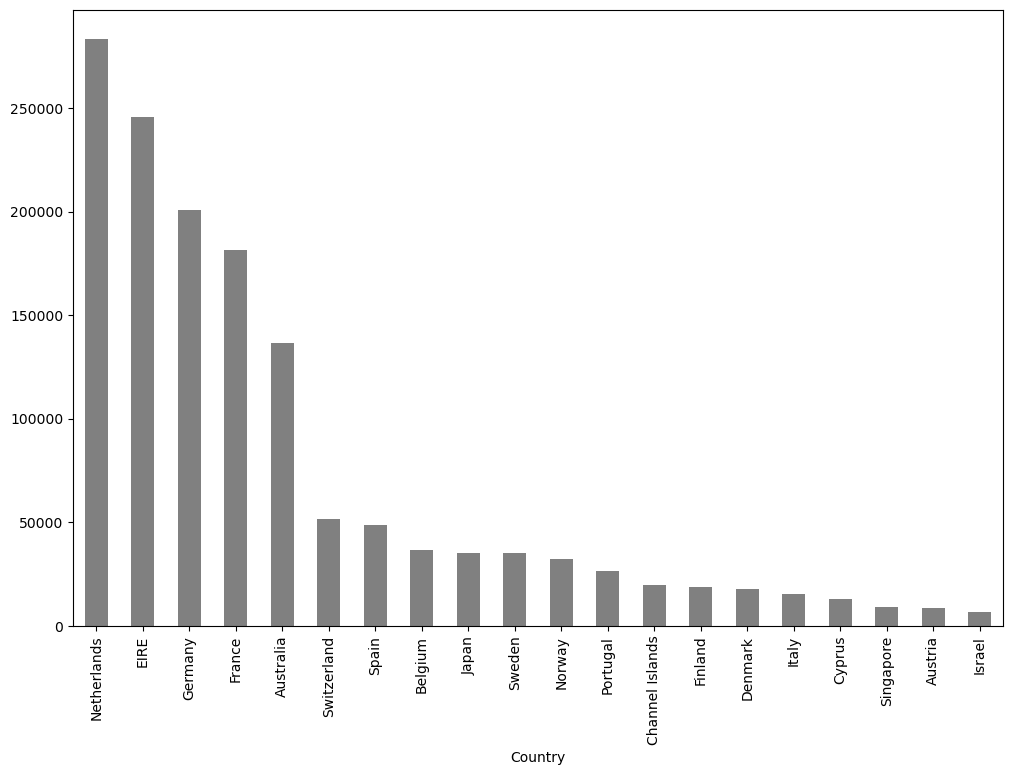

In [30]:
plt.figure(figsize=(12, 8))
df[df['Country'] != 'United Kingdom'].groupby(['Country'])['Total_bills'].sum().sort_values(ascending=False).nlargest(20).plot.bar(color='grey')

- 2011년 B2C 전자상거래 부문에서 2010년 가장 높은 매출을 기록한 곳은 영국, 독일, 프랑스, 스페인, 이탈리아 순
- 전체 인구당 인터넷 사용자의 비율은 노르웨이, 네덜란드, 덴마크, 핀란드 순
- 모바일 인터넷 보급률이 상승하며 전자상거래 시장이 확대되었던 시기이고, 그 중에서도 서유럽 국가들이 지리적으로 유리한 입지에 있어 높은 판매를 기록한 것으로 보임.
- 2007년에 네덜란드는 이미 5000개가 넘는 온라인 스토어와 배송 업체를 보유하고 있는 국가였고 해외 플랫폼뿐만 아니라 현지 플랫폼의 사용률도 높다.
- 출처 : https://blog.naver.com/gii_korea/150128206514
- https://dream.kotra.or.kr/kotranews/cms/news/actionKotraBoardDetail.do?SITE_NO=3&MENU_ID=80&CONTENTS_NO=2&bbsGbn=242&bbsSn=242&pNttSn=113021
- https://dream.kotra.or.kr/kotranews/cms/news/actionKotraBoardDetail.do?SITE_NO=3&MENU_ID=180&CONTENTS_NO=1&bbsGbn=243&bbsSn=243&pNttSn=213143

### 국가별로 어떤 상품을 가장 많이 샀을까?

In [31]:
# 상위 20개 국가 리스트
top20_country = list(df[df['Country'] != 'United Kingdom'].groupby(['Country'])['Quantity'].sum().sort_values(ascending=False).nlargest(20).index)
# 20개국 최대 판매 상품
desc_list = []
country_list = []
total_bills_list = []
for i in top20_country:
    country_list.append(i)
    desc_list.append(df[df['Country'] == i].groupby(['Description', 'Country'])['Quantity'].sum().nlargest(1).reset_index()['Description'][0])
    total_bills_list.append(round(df[df['Country'] == i].groupby(['Description', 'Country'])['Quantity'].sum().nlargest(1).reset_index()['Quantity'][0], 2))

In [32]:
pd.DataFrame({'Country' : country_list,
             'Description' : desc_list,
             'Total_bills' : total_bills_list})

,Country,Description,Total_bills
0,Netherlands,RABBIT NIGHT LIGHT,4801
1,EIRE,SMALL POPCORN HOLDER,1785
2,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1206
3,France,RABBIT NIGHT LIGHT,3999
4,Australia,MINI PAINT SET VINTAGE,2916
5,Sweden,MINI PAINT SET VINTAGE,2916
6,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS,636
7,Spain,PINK 3 PIECE POLKADOT CUTLERY SET,1089
8,Japan,RABBIT NIGHT LIGHT,3401
9,Belgium,PACK OF 72 RETROSPOT CAKE CASES,480


In [63]:
df['Is_UK'] = 0
df.loc[df['Country'] != 'United Kingdom', 'Is_UK'] = 0
df.loc[df['Country'] == 'United Kingdom', 'Is_UK'] = 1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,InvoiceTime,InvoiceWeekday,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,Is_UK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12,08:26,2,2.55,17850,United Kingdom,15.30,Completed,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12,08:26,2,3.39,17850,United Kingdom,20.34,Completed,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12,08:26,2,2.75,17850,United Kingdom,22.00,Completed,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12,08:26,2,3.39,17850,United Kingdom,20.34,Completed,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12,08:26,2,3.39,17850,United Kingdom,20.34,Completed,1


In [65]:
df_foreign = df[df['Is_UK'] == 0]
df_foreign.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,InvoiceTime,InvoiceWeekday,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,Is_UK
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,2010-12,08:45,2,3.75,12583,France,90.0,Completed,0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,2010-12,08:45,2,3.75,12583,France,90.0,Completed,0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,2010-12,08:45,2,3.75,12583,France,45.0,Completed,0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,2010-12,08:45,2,0.85,12583,France,10.2,Completed,0
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,2010-12,08:45,2,0.65,12583,France,15.6,Completed,0


### Invoice Date
-----
- 월별 매출액, 분기별 매출액
- 재구매율, 이탈율

In [64]:
df.insert(5, 'InvoiceWeekday', df['InvoiceDate'].dt.weekday)
df.insert(5, 'InvoiceTime', df['InvoiceDate'].dt.strftime('%H:%M'))
df.insert(5, 'InvoiceMonth', df['InvoiceDate'].dt.strftime('%Y-%m'))
df.head()

- df_og = cutomerID Null값 삭제 안 된 데이터 원본
- 전체 매출 파악위해서는 해당 값도 필요

### 월별 매출액, 월별 구매자수

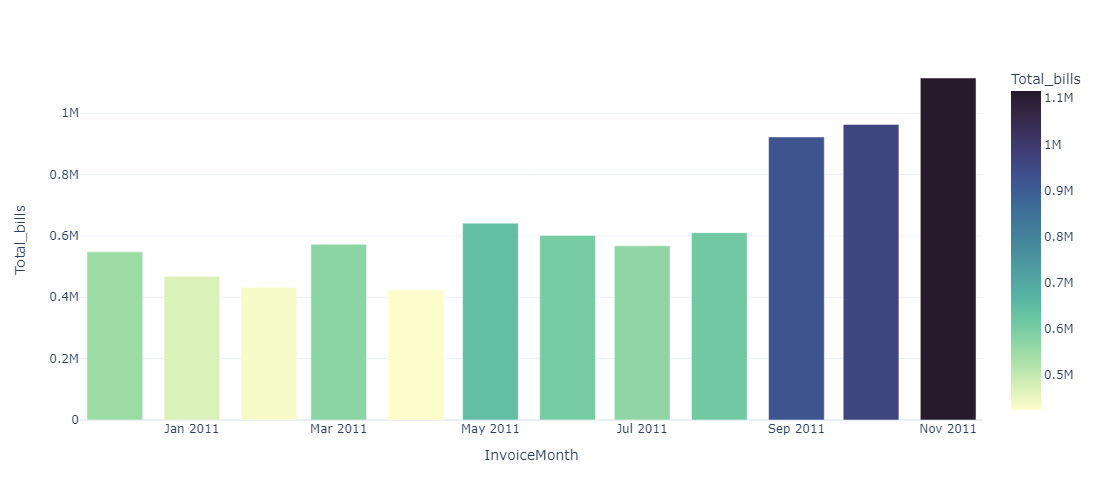

In [38]:
fig = px.bar(df[df['InvoiceMonth'] != '2011-12'].groupby(['InvoiceMonth'])['Total_bills'].sum().reset_index(), x='InvoiceMonth', y='Total_bills', color='Total_bills', color_continuous_scale = 'deep', width=1000, height=500)
fig.show()

### 해외 구매자 월별 매출액

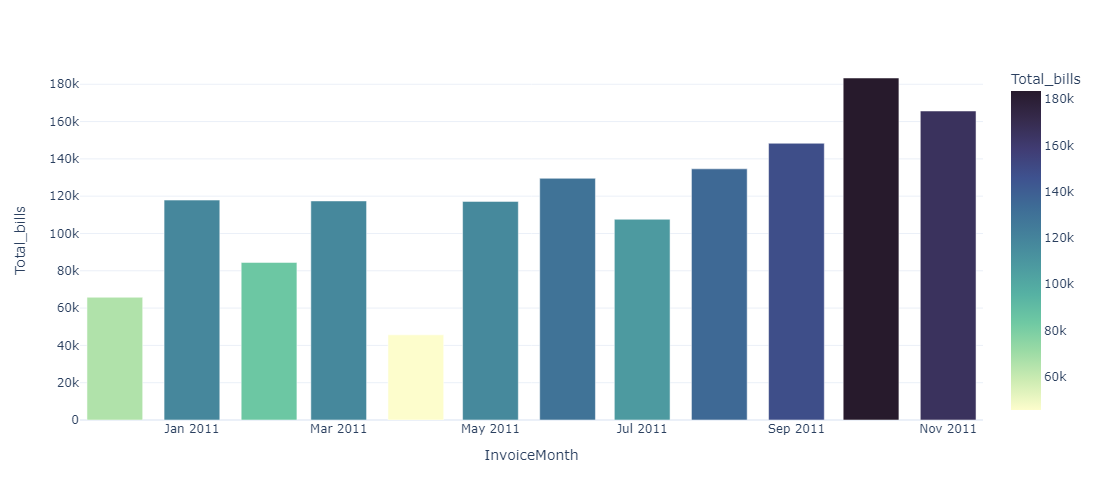

In [67]:
fig = px.bar(df_foreign[df_foreign['InvoiceMonth'] != '2011-12'].groupby(['InvoiceMonth'])['Total_bills'].sum().reset_index(), x='InvoiceMonth', y='Total_bills', color='Total_bills', color_continuous_scale = 'deep', width=1000, height=500)
fig.show()

- 해외 구매자의 1월과 10월의 매출액이 크고, 6월의 매출액은 전체 매출액, 해외 매출액이 낮다.

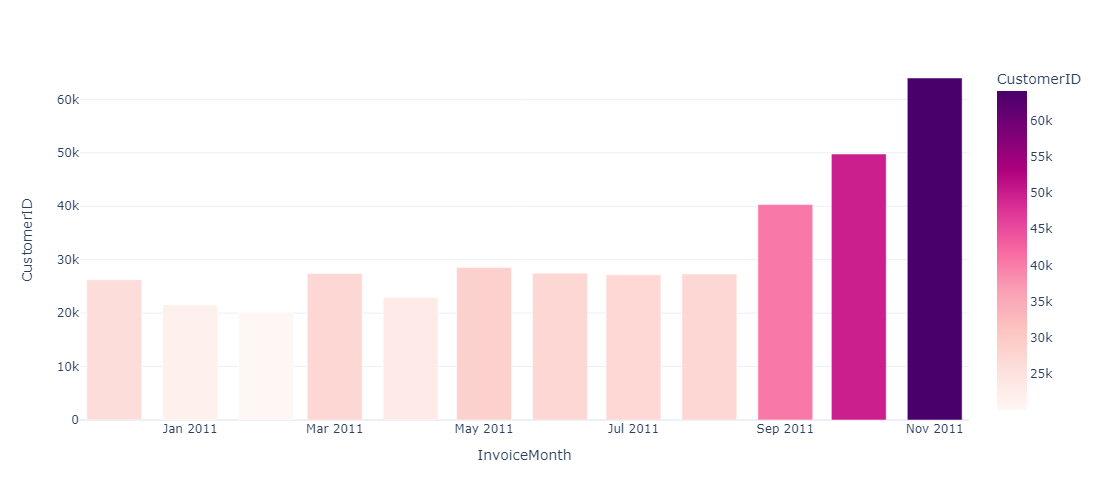

In [39]:
fig = px.bar(df[df['InvoiceMonth'] != '2011-12'].groupby(['InvoiceMonth'])['CustomerID'].count().reset_index(), x='InvoiceMonth', y='CustomerID', color='CustomerID', color_continuous_scale = 'RdPu', width=1000, height=500)
fig.show()

### 해외 구매자 구매자수

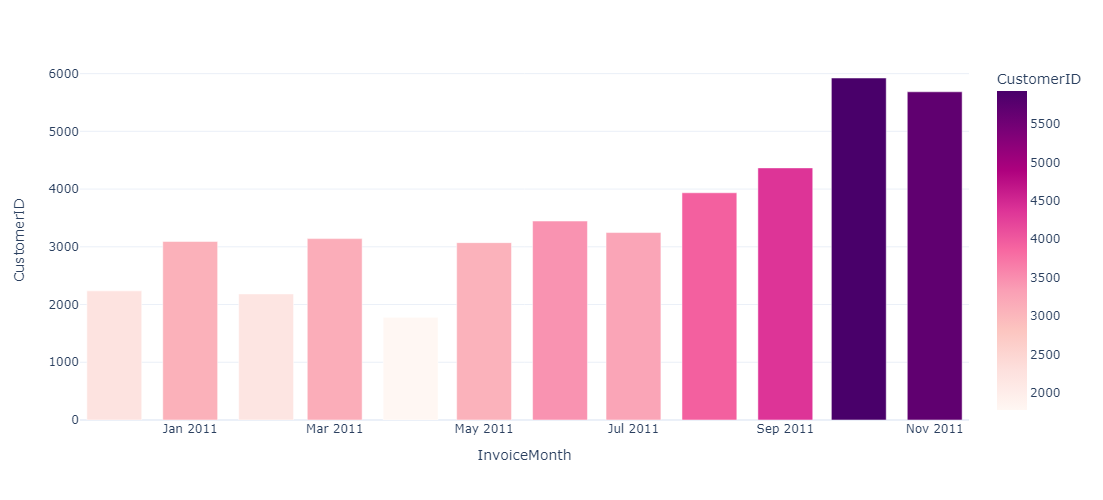

In [66]:
fig = px.bar(df_foreign[df_foreign['InvoiceMonth'] != '2011-12'].groupby(['InvoiceMonth'])['CustomerID'].count().reset_index(), x='InvoiceMonth', y='CustomerID', color='CustomerID', color_continuous_scale = 'RdPu', width=1000, height=500)
fig.show()

- 해외 구매자 기준 10월 구매자수가 가장 많다.

# 코호트 분석
- 사용자 행동을 그룹으로 나눠 지표별로 수치화한 뒤 분석
- 예를 들어 12월 1일세션을 시작한 사용자를 그룹으로 나누어 해당 그룹이 몇 % 재방문하였는지 비중을 알 수 있음.
- 12월 1일 첫구매를 한 사용자 중 이후 얼마나 재구매를 하였을까?
- 즉, 코호트 그룹 별 사용자 유지율을 확인할 수 있음.
- 반대로 첫 구매 후 며칠 이후에 재구매율이 하락하는지 파악할 수 있음
- https://www.beusable.net/blog/?p=4355

#### 첫 구매일 기준으로 코호트 그룹 분리

In [68]:
df_cohort = df[df['InvoiceMonth'] != '2011-12']
cohort_group = df_cohort.groupby(['CustomerID'])[['InvoiceMonth']].min()
cohort_group.rename(columns={'InvoiceMonth' : 'CohortGroup'}, inplace=True)
df_cohort = pd.merge(df_cohort, cohort_group, on ='CustomerID', how='left')
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,InvoiceTime,InvoiceWeekday,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,Is_UK,CohortGroup
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12,08:26,2,2.55,17850,United Kingdom,15.30,Completed,1,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12,08:26,2,3.39,17850,United Kingdom,20.34,Completed,1,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12,08:26,2,2.75,17850,United Kingdom,22.00,Completed,1,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12,08:26,2,3.39,17850,United Kingdom,20.34,Completed,1,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12,08:26,2,3.39,17850,United Kingdom,20.34,Completed,1,2010-12


#### 코호트 그룹별 총 구매액과 평균 구매액 구하기

In [69]:
df_cohort = df_cohort.groupby(['CohortGroup', 'InvoiceMonth'])
df_cohort = df_cohort.agg({'CustomerID' : pd.Series.nunique, 'Total_bills':['sum', 'mean']}).reset_index()
df_cohort.columns = ['CohortGroup', 'InvoiceMonth', 'Customers', 'TotalSpending', 'AverageSpending']
df_cohort

,CohortGroup,InvoiceMonth,Customers,TotalSpending,AverageSpending
0,2010-12,2010-12,947,548115.84,20.869473
1,2010-12,2011-01,361,269927.83,25.123588
2,2010-12,2011-02,315,229342.22,25.319300
3,2010-12,2011-03,367,299263.47,25.124966
4,2010-12,2011-04,340,199012.05,19.979124
...,...,...,...,...,...
73,2011-09,2011-10,89,25344.57,10.429864
74,2011-09,2011-11,97,35275.22,13.206747
75,2011-10,2011-10,352,151683.12,13.100978
76,2011-10,2011-11,91,38501.51,10.851609


### 코호트별 첫 구매월을 기준으로 얼마나 지났는지 표기

In [70]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df
df_cohort= df_cohort.groupby(['CohortGroup']).apply(cohort_period)
df_cohort.head()

CohortGroup InvoiceMonth  Customers  TotalSpending  \
CohortGroup                                                        
2010-12     0     2010-12      2010-12        947      548115.84   
            1     2010-12      2011-01        361      269927.83   
            2     2010-12      2011-02        315      229342.22   
            3     2010-12      2011-03        367      299263.47   
            4     2010-12      2011-04        340      199012.05   

               AverageSpending  CohortPeriod  
CohortGroup                                   
2010-12     0        20.869473             1  
            1        25.123588             2  
            2        25.319300             3  
            3        25.124966             4  
            4        19.979124             5

In [71]:
df_cohort.reset_index(drop=True, inplace=True)
df_cohort.head()

,CohortGroup,InvoiceMonth,Customers,TotalSpending,AverageSpending,CohortPeriod
0,2010-12,2010-12,947,548115.84,20.869473,1
1,2010-12,2011-01,361,269927.83,25.123588,2
2,2010-12,2011-02,315,229342.22,25.319300,3
3,2010-12,2011-03,367,299263.47,25.124966,4
4,2010-12,2011-04,340,199012.05,19.979124,5


### 코호트별 재구매율 시각화

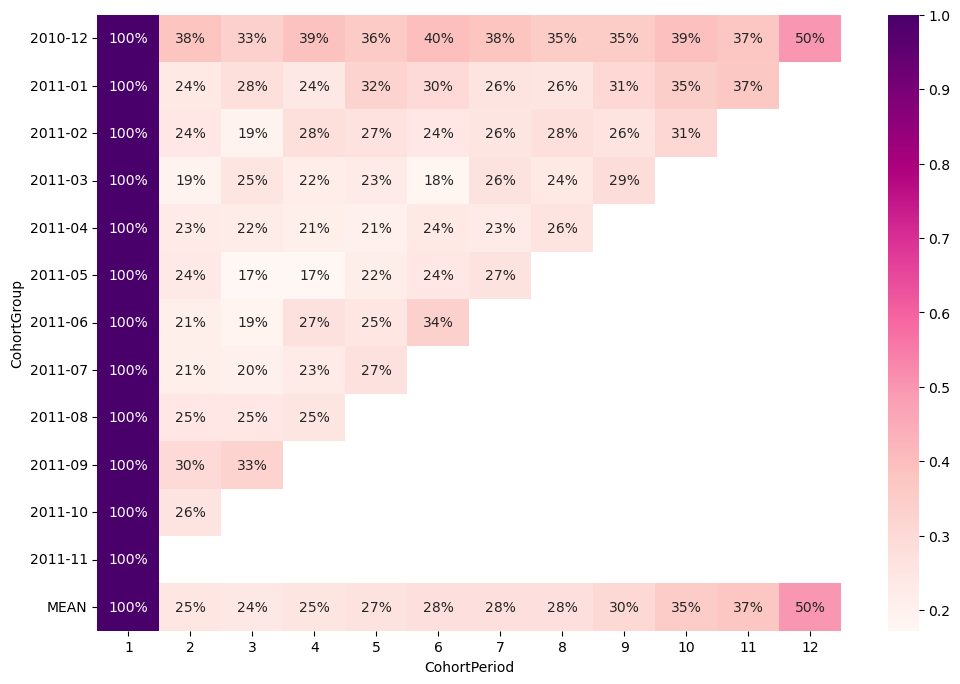

In [72]:
cohort_pivot = df_cohort.pivot_table(index='CohortGroup', columns='CohortPeriod', values='Customers')
cohort_retention = cohort_pivot.divide(cohort_pivot[1], axis=0)
cohort_retention.loc['MEAN'] = cohort_retention.mean(axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(cohort_retention, annot=True, cmap='RdPu', fmt='.0%')
plt.show()

- 2010년 12월 코호트의 재방문율이 가장 높은 편이다. 12월 이전의 구매자들도 이 그룹으로 계산되었기 때문일 수도 있음)
- 2010년 12월 방문자 수의 절반이 2011년 11월에도 방문하였음. 계절성있는 상품에 대한 수요를 나타낼 수도 있다.
- 공통적으로 2011년 11월의 재방문율이 높은 편이다.

### 코호트별 TotalSpending

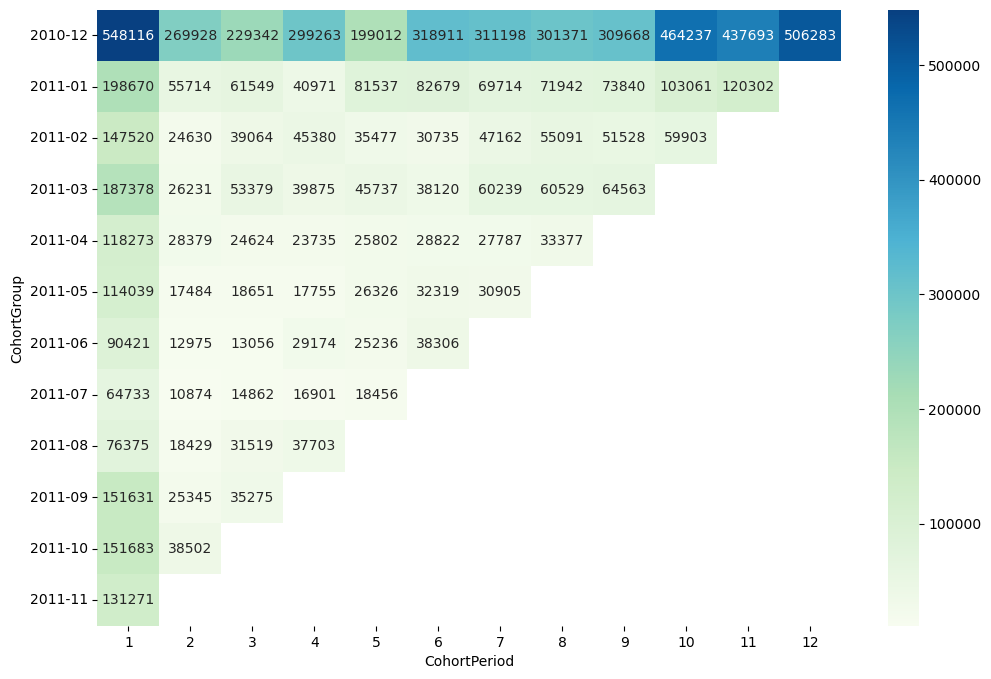

In [73]:
cohort_pivot = df_cohort.pivot_table(index='CohortGroup', columns='CohortPeriod', values='TotalSpending')
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, cmap='GnBu', fmt='.0f')
plt.show()

- 2010년 12월 코호트의 총 구매액이 가장 크다. 위의 분석과 마찬가지로, 이전의 구매자들이 2010년 12월 그룹에 포함되어 값이 크게 나올 수 있다.
- 2010/12월 코호트의 2011년 11월의 총 구매액은 2010년 12월 금액과 비슷하게 크다.

### 코호트별 구매 평균 금액

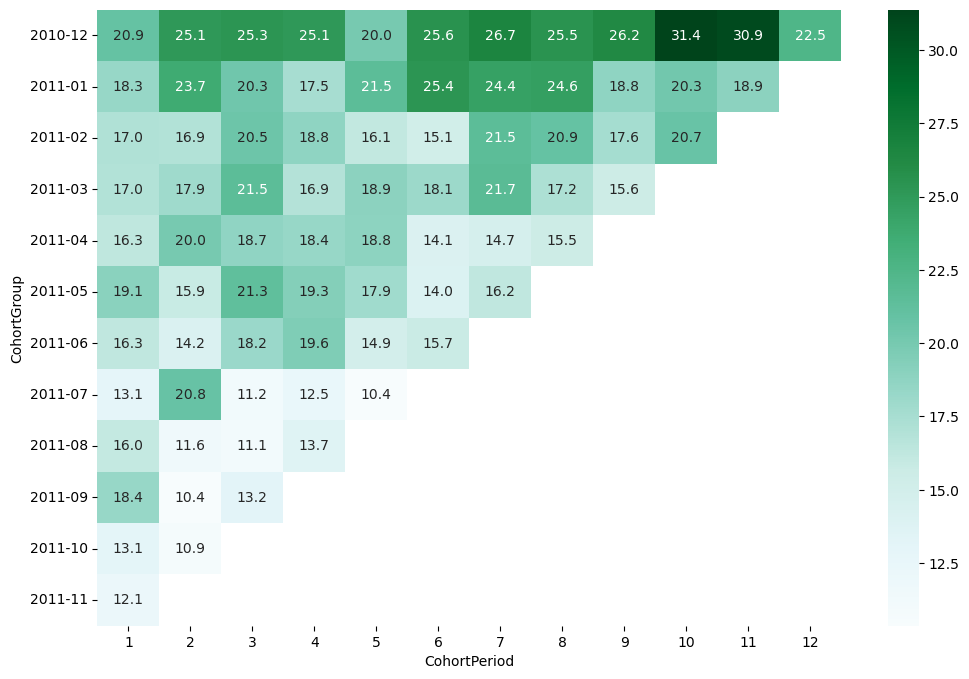

In [74]:
cohort_pivot = df_cohort.pivot_table(index='CohortGroup', columns='CohortPeriod', values='AverageSpending')
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, cmap='BuGn', fmt='.1f')
plt.show()

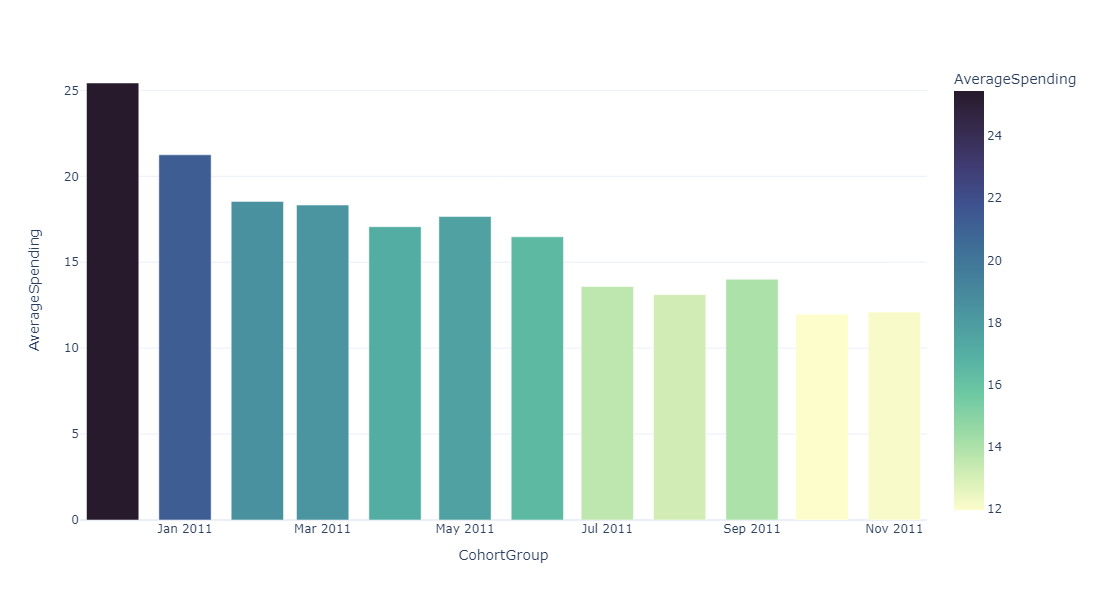

In [75]:
cohort_spending = df_cohort.groupby(['CohortGroup'])[['AverageSpending']].mean().reset_index()
fig = px.bar(cohort_spending, x='CohortGroup', y='AverageSpending', color='AverageSpending', color_continuous_scale = 'deep', width=1200, height=600)
fig.show()

- 평균적으로 2010년 12월 코호트의 평균 구매액이 가장 큰 편임. 뒤로 갈수록 평균 금액이 감소하는 추세이다.

### 고객별 구매 정보 정리 - 고객별 이탈 가능성 파악
- https://chaelist.github.io/docs/kaggle/uk_ecommerce/

1. 고객별 구매 내역을 월별로 정리

In [103]:
# 총 구매액이 0이상인 데이터
df_purchase = df[(df['Total_bills'] > 0) & (df['InvoiceMonth'] != '2011-12')]

# 월별로 구매건수의 합 피벗 테이블
df_purchase = pd.pivot_table(df_purchase, index='CustomerID', columns='InvoiceMonth', values='InvoiceNo', aggfunc = 'count')
# 값이 0이상이면 0, 아니면 X로 표현
df_purchase = df_purchase.applymap(lambda x: 'O' if x > 0 else 'X')
df_purchase.head()

InvoiceMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
CustomerID,,,,,,,,,,,,
12346,X,O,X,X,X,X,X,X,X,X,X,X
12347,O,O,X,X,O,X,O,X,O,X,O,X
12348,O,O,X,X,O,X,X,X,X,O,X,X
12349,X,X,X,X,X,X,X,X,X,X,X,O
12350,X,X,O,X,X,X,X,X,X,X,X,X


2. 고객별로, 구매와 구매사이에 걸리는 평균 기간을 계산

In [97]:
for index in df_purchase.index:
    templist = df_purchase.loc[index].to_list()

    month_btw = []
    for i in range(12):
        if templist[i] == 'O' :
            for j in range(1, 12 - i):
                if templist[i+j] == 'O': # 첫번째 'O'와 두번째 'O'사이의 간격을 count
                    month_btw.append(j)
                    break
    if month_btw:
        month_btw_avg = sum(month_btw) / len(month_btw) # 간격의 총합 / 간격의 개수 = 평균 구매 간격

    else:
        if (df_purchase.loc[index, '2011-11']=='O') or (df_purchase.loc[index, '2011-10'] == 'O'):
            month_btw_avg = 'New Customer'
        else:
            month_btw_avg = 'Never Returned'
    df_purchase.loc[index, 'avg_month_btw_purchases'] = month_btw_avg

df_purchase.head()

InvoiceMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,avg_month_btw_purchases
CustomerID,,,,,,,,,,,,,
12346,X,O,X,X,X,X,X,X,X,X,X,X,Never Returned
12347,O,O,X,X,O,X,O,X,O,X,O,X,2.0
12348,O,O,X,X,O,X,X,X,X,O,X,X,3.0
12349,X,X,X,X,X,X,X,X,X,X,X,O,New Customer
12350,X,X,O,X,X,X,X,X,X,X,X,X,Never Returned


In [98]:
never_returned = df_purchase[df_purchase['avg_month_btw_purchases']=='Never Returned'].index
len(never_returned) / len(df_purchase)

0.25605214152700184

- 2010.12 ~ 2011.09 중 한 번 구매하고 다시 돌아오지 않은 고객은 1100명이다.

- 재구매 고객들의 평균 구매 간격은 2.87이다.

### 월별 이탈율
- 구매 이후 3개월 간 이용이 없는 이용자를 '이탈자'로 간주하고 월별 변화를 분석

In [80]:
customer_churn = df_purchase.copy()
customer_churn.drop('avg_month_btw_purchases', axis=1, inplace=True)
customer_churn.head()

InvoiceMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
CustomerID,,,,,,,,,,,,
12346,X,O,X,X,X,X,X,X,X,X,X,X
12347,O,O,X,X,O,X,O,X,O,X,O,X
12348,O,O,X,X,O,X,X,X,X,O,X,X
12349,X,X,X,X,X,X,X,X,X,X,X,O
12350,X,X,O,X,X,X,X,X,X,X,X,X


- 3개월 이내에 다시 구매한 경우, 'Returning'이라고 표기
- 구매가 일어나지 않은 월은 'N/A'라고 표기

In [81]:
columns = customer_churn.columns

for index in customer_churn.index:
    usage_list = list(customer_churn.loc[index])
    for i in range(len(columns) - 3):
        if usage_list[i] == 'X':
            customer_churn.loc[index, columns[i]] = 'N/A'
        else:
            if 'O' in usage_list[i+1 : i+4]:
                customer_churn.loc[index, columns[i]] = 'Returning'
            else:
                customer_churn.loc[index, columns[i]] = 'Churn'
customer_churn.drop(['2011-09', '2011-10', '2011-11'], axis=1, inplace=True)
customer_churn.head()

InvoiceMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08
CustomerID,,,,,,,,,
12346,N/A,Churn,N/A,N/A,N/A,N/A,N/A,N/A,N/A
12347,Returning,Returning,N/A,N/A,Returning,N/A,Returning,N/A,Returning
12348,Returning,Returning,N/A,N/A,Churn,N/A,N/A,N/A,N/A
12349,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
12350,N/A,N/A,Churn,N/A,N/A,N/A,N/A,N/A,N/A


In [82]:
customer_churn = customer_churn.unstack().reset_index()
customer_churn.rename(columns={0:'ChurnFlag'}, inplace=True)
customer_churn.head()

,InvoiceMonth,CustomerID,ChurnFlag
0,2010-12,12346,N/A
1,2010-12,12347,Returning
2,2010-12,12348,Returning
3,2010-12,12349,N/A
4,2010-12,12350,N/A


### 월별 Churn / Returning 고객 수 및 비율을 계산

In [83]:
# InvoiceMonth, ChurnFlag를 기준으로 groupby ('N/A는 무시')
monthly_churn = customer_churn.query('ChurnFlag != "N/A"')
monthly_churn = monthly_churn.groupby(['InvoiceMonth', 'ChurnFlag'])[['CustomerID']].count()
monthly_churn.rename(columns={'CustomerID' : 'CustomerCount'}, inplace=True)

#월별로 Churn vs Returning 비율을 계산
monthly_churn['Percentage'] = monthly_churn.groupby(level=0)['CustomerCount'].transform(lambda x : x / x.sum())
monthly_churn.head()

CustomerCount  Percentage
InvoiceMonth ChurnFlag                           
2010-12      Churn                357    0.403846
             Returning            527    0.596154
2011-01      Churn                263    0.354926
             Returning            478    0.645074
2011-02      Churn                254    0.335092

### 월별 이탈율 추이

- 월별 재구매자수 & 이탈자수 추이

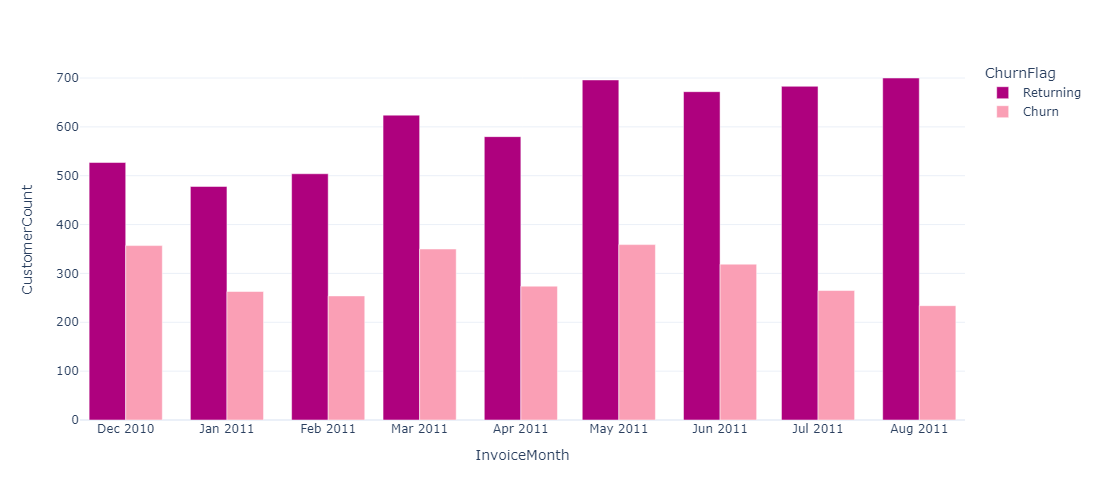

In [84]:
fig = px.bar(monthly_churn.reset_index(), 
             x = 'InvoiceMonth', y='CustomerCount', 
             color='ChurnFlag', 
             barmode='group', 
             category_orders = {'ChurnFlag' : ['Returning', 'Churn']},
            hover_data={'Percentage' : ':.0%'},
            color_discrete_sequence = [px.colors.sequential.RdPu[6], px.colors.sequential.RdPu[3]], width=1000, height=500)
fig.show()

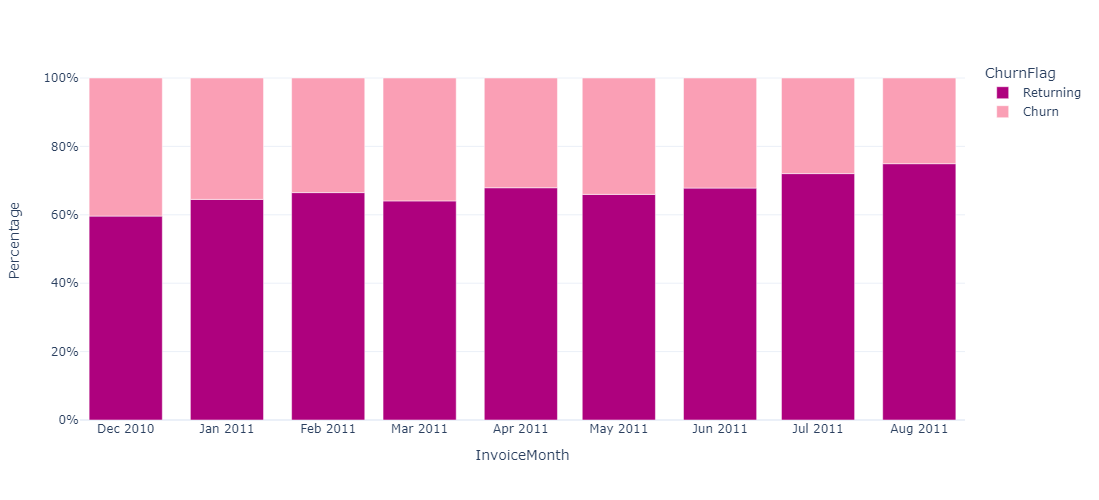

In [85]:
fig = px.bar(monthly_churn.reset_index(),
            x='InvoiceMonth', y='Percentage', color='ChurnFlag',
            category_orders = {'ChurnFlag' : ['Returning', 'Churn']},
            color_discrete_sequence = [px.colors.sequential.RdPu[6], px.colors.sequential.RdPu[3]], width=1000, height=500)

fig.update_yaxes(tickformat = '.0%')
fig.show()

- 재구매자 수는 2010년 12월 이후 증가하는 추세이고, 2011년 8월 약 30% 증가하였다.
- 이탈자수는 2011년 5월 이후 비교적 감소 추세이다.
- 2011년 8월 재구매자 수가 가장 많고, 이탈자 수가 가장 적다.

### 월별 신규 유입률

In [86]:
new_customer = df_purchase.copy()

# 월별 이용 내역을 바탕으로, 신규 유입 여부 정리
new_customer.drop('avg_month_btw_purchases', axis=1, inplace=True)
columns = new_customer.columns

for index in new_customer.index:
    usage_list = list(new_customer.loc[index])
    for i in range(3, len(columns)):
        if usage_list[i] == 'X':
            new_customer.loc[index, columns[i]] = 'N/A'
        else:
            if 'O' in usage_list[i-3: i]:
                new_customer.loc[index, columns[i]] = 'Returning'
            else:
                new_customer.loc[index, columns[i]] = 'New'
new_customer.drop(['2010-12', '2011-01', '2011-02'], axis=1, inplace=True)
new_customer.head()

InvoiceMonth,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
CustomerID,,,,,,,,,
12346,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
12347,N/A,Returning,N/A,Returning,N/A,Returning,N/A,Returning,N/A
12348,N/A,Returning,N/A,N/A,N/A,N/A,New,N/A,N/A
12349,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,New
12350,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [87]:
# unstack & rename
new_customer = new_customer.unstack().reset_index()
new_customer.rename(columns={'level_0' : 'InvoiceMonth', 0 : 'NewFlag'}, inplace=True)

# # InvoiceMonth, NewFlag기준으로 groupby ( N/A는 무시 )
monthly_new = new_customer.query('NewFlag != "N/A"')
monthly_new = monthly_new.groupby(['InvoiceMonth', 'NewFlag'])[['CustomerID']].count()
monthly_new.rename(columns={'CustomerID' : 'CustomerCount'}, inplace=True)
monthly_new.head()

#월별로 New vs Returning 비율을 계산
monthly_new['Percentage'] = monthly_new.groupby(level=0)['CustomerCount'].transform(lambda x : x / x.sum())
monthly_new.head()

CustomerCount  Percentage
InvoiceMonth NewFlag                             
2011-03      New                  452    0.464066
             Returning            522    0.535934
2011-04      New                  361    0.422717
             Returning            493    0.577283
2011-05      New                  372    0.352607

### 월별 신규 유입률 추이

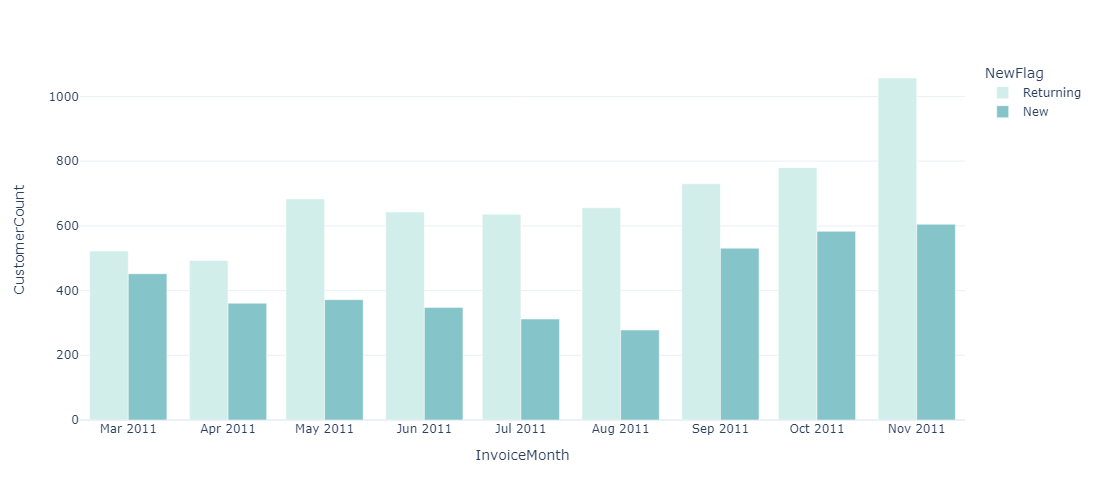

In [88]:
fig = px.bar(monthly_new.reset_index(),
            x = 'InvoiceMonth', y='CustomerCount', color='NewFlag', barmode='group',
            category_orders = {'NewFlag' : ['Returning', 'New']},
            hover_data = {'Percentage' : ':.0%'},
            color_discrete_sequence = [px.colors.sequential.Teal[0], px.colors.sequential.Teal[2]], width=1000, height=500)

fig.show()

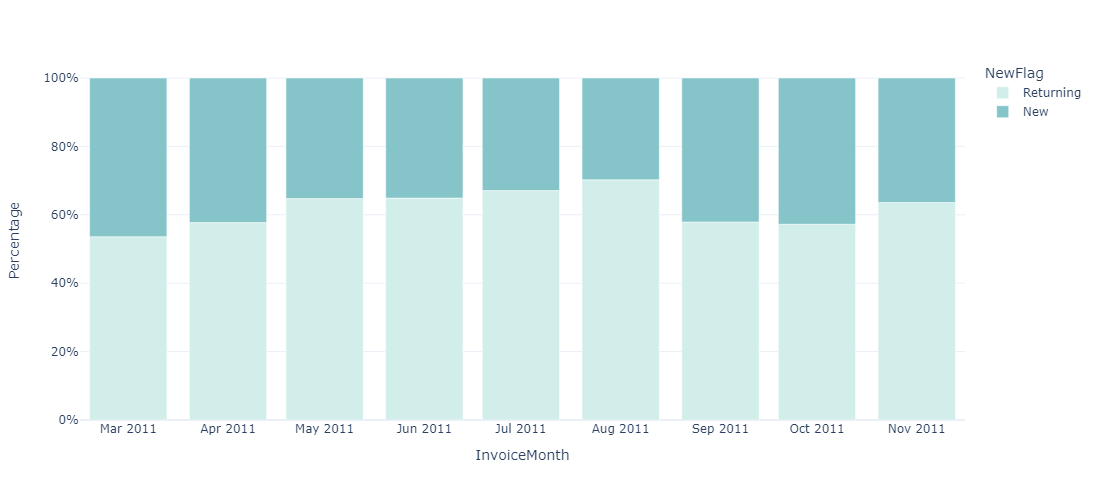

In [89]:
fig = px.bar(monthly_new.reset_index(),
            x = 'InvoiceMonth', y='Percentage', color='NewFlag',
             category_orders = {'NewFlag' : ['Returning', 'New']},
            color_discrete_sequence = [px.colors.sequential.Teal[0], px.colors.sequential.Teal[2]], width=1000, height=500)

fig.update_yaxes(tickformat='.0%')
fig.show()

- 2011년 3월부터 8월까지 신규유입이 지속적으로 하락했다가, 9월부터 상승하는 추세이다. 계절성과의 연관성
- 2011년 8월부터 재구매자의 수가 증가하는 추세이다.
- 2011년 8월 재구매자의 비율이 가장 많고, 신규유입률의 수가 가장 적다.

In [104]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,InvoiceTime,InvoiceWeekday,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,Is_UK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12,08:26,2,2.55,17850,United Kingdom,15.30,Completed,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12,08:26,2,3.39,17850,United Kingdom,20.34,Completed,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12,08:26,2,2.75,17850,United Kingdom,22.00,Completed,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12,08:26,2,3.39,17850,United Kingdom,20.34,Completed,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12,08:26,2,3.39,17850,United Kingdom,20.34,Completed,1


### 상반기 고객별 구매 데이터 정리 ( 총 구매액, 총수량, 총 구매 횟수, 총 취소 건수 등)

In [132]:
customer_df = df.groupby(['CustomerID'])['InvoiceDate'].max().reset_index()
# 데이터셋에서 가장 마지막 날짜
most_recent_date = df['InvoiceDate'].max()
customer_df['Recent_Date'] = most_recent_date
# 구매자의 가장 최근 구매 날짜
customer_df['Recency'] = (customer_df['Recent_Date'] - customer_df['InvoiceDate']).dt.days
customer_df.drop(['Recent_Date', 'InvoiceDate'], axis=1, inplace=True)
customer_df.reset_index()
customer_df.head()

,CustomerID,Recency
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


In [79]:
# 총 구매액, 총수량, 총 구매횟수
customer_gr = df.groupby(['CustomerID']).agg({'Total_bills' : 'sum', 'InvoiceNo' : lambda x : x.nunique()}).reset_index()
# 컬럼 변경
customer_gr.columns=['CustomerID', 'Monetary', 'Frequency']
customer_gr.head()

,CustomerID,Monetary,Frequency
0,12346,0.00,2
1,12347,4310.00,7
2,12348,1437.24,4
3,12349,1457.55,1
4,12350,294.40,1


In [134]:
# customer_df와 병합
customer_df = pd.merge(customer_df, customer_gr, on='CustomerID', how='left')
customer_df.head()

,CustomerID,Recency,Monetary,Frequency
0,12346,325,0.00,2
1,12347,1,4310.00,7
2,12348,74,1437.24,4
3,12349,18,1457.55,1
4,12350,309,294.40,1


### customer_df describe확인

In [85]:
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4371.0,91.167925,100.830014,0.00,16.00,49.00,142.00,373.00
Monetary,4371.0,1877.540946,8193.534499,-4287.63,290.61,638.27,1584.03,278672.42
Frequency,4371.0,5.027225,9.186944,1.00,1.00,3.00,5.00,246.00


### Outlier제거

In [135]:
from scipy.stats.mstats import winsorize
import scipy.stats as stats

# Z-점수 계산
z_scores_monetary = np.abs(stats.zscore(customer_df['Monetary']))
z_scores_frequency = np.abs(stats.zscore(customer_df['Frequency']))
# 임계값 설정
z_score_threshold = 3
# 이상치 식별
outliers_quantity = customer_df[z_scores_monetary > z_score_threshold]
outliers_unitprice = customer_df[z_scores_frequency > z_score_threshold]

In [136]:
outliers_quantity

,CustomerID,Recency,Monetary,Frequency
55,12415,23,123638.18,24
330,12748,0,28481.56,222
458,12931,21,33462.81,20
564,13081,0,27972.08,20
568,13089,2,57322.13,118
576,13098,0,28658.88,41
802,13408,1,27832.80,77
1004,13694,3,62937.54,58
1077,13798,0,36352.87,63
1294,14088,9,50415.49,14


In [137]:
customer_w = customer_df.copy()

customer_w['Recency_winsorized'] = winsorize(customer_w['Recency'], limits=[0.03, 0.03])
customer_w['Frequency_winsorized'] = winsorize(customer_w['Frequency'], limits=[0.03, 0.03])
customer_w['Monetary_winsorized'] = winsorize(customer_w['Monetary'], limits=[0.03, 0.03])

In [138]:
customer_w.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4371.0,91.167925,100.830014,0.00,16.00,49.00,142.00,373.00
Monetary,4371.0,1877.540946,8193.534499,-4287.63,290.61,638.27,1584.03,278672.42
Frequency,4371.0,5.027225,9.186944,1.00,1.00,3.00,5.00,246.00
Recency_winsorized,4371.0,90.391901,98.717939,1.00,16.00,49.00,142.00,337.00
Frequency_winsorized,4371.0,4.447724,4.764495,1.00,1.00,3.00,5.00,21.00
Monetary_winsorized,4371.0,1330.060191,1739.157369,72.00,290.61,638.27,1584.03,7803.77


In [139]:
customer_w.drop(['Monetary', 'Frequency', 'Recency'], axis=1, inplace=True)
customer_w.head()

,CustomerID,Recency_winsorized,Frequency_winsorized,Monetary_winsorized
0,12346,325,2,72.00
1,12347,1,7,4310.00
2,12348,74,4,1437.24
3,12349,18,1,1457.55
4,12350,309,1,294.40


### RFM Histogram 시각화

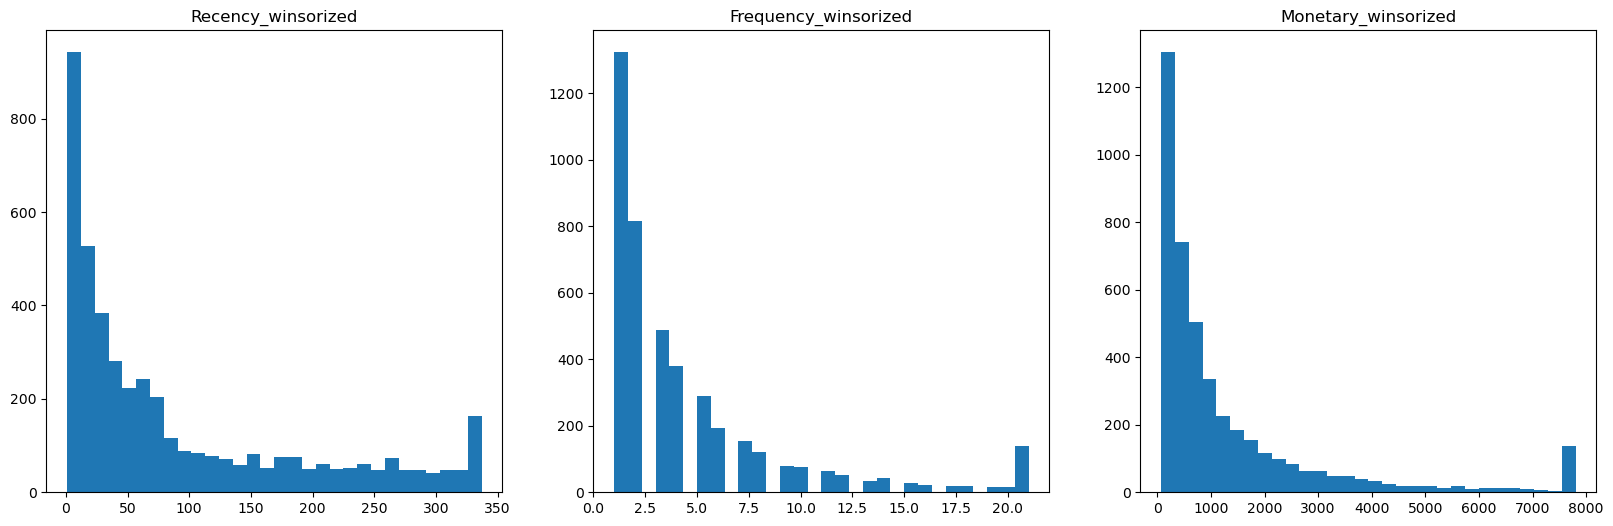

In [140]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
columns = ['Recency_winsorized', 'Frequency_winsorized', 'Monetary_winsorized']
for i, column in enumerate(columns):
    axs[i].hist(customer_w[column], bins=30)
    axs[i].set_title(f'{column}')

- 아웃라이어 영향을 최소화한 RobustScaler 방법

In [141]:
from sklearn.preprocessing import robust_scale
from sklearn.preprocessing import minmax_scale

customer_w['Recency_winsorized'] = -(robust_scale(customer_w['Recency_winsorized'], axis=0)) # Recency가 적을 수록 (+)
customer_w['Frequency_winsorized'] = robust_scale(customer_w['Frequency_winsorized'], axis=0)
customer_w['Monetary_winsorized'] = robust_scale(customer_w['Monetary_winsorized'], axis=0)

customer_w.head()

,CustomerID,Recency_winsorized,Frequency_winsorized,Monetary_winsorized
0,12346,-2.190476,-0.25,-0.437808
1,12347,0.380952,1.00,2.838776
2,12348,-0.198413,0.25,0.617719
3,12349,0.246032,-0.50,0.633421
4,12350,-2.063492,-0.50,-0.265861


- 최종 score 1~ 100 까지로 산출하기 feat.minmaxScaler

In [142]:
customer_w['Score'] = minmax_scale(customer_w['Recency_winsorized'] + customer_w['Frequency_winsorized'] + customer_w['Monetary_winsorized'], axis=0)
customer_w['Score'] = round(customer_w['Score'] * 100, 1)
customer_w.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency_winsorized,4371.0,-0.328507,0.783476,-2.285714,-0.738095,0.0,0.261905,0.380952
Frequency_winsorized,4371.0,0.361931,1.191124,-0.500000,-0.500000,0.0,0.500000,4.500000
Monetary_winsorized,4371.0,0.534853,1.344619,-0.437808,-0.268791,0.0,0.731209,5.539964
Score,4371.0,27.789522,20.718900,0.000000,15.800000,22.4,34.400000,100.000000


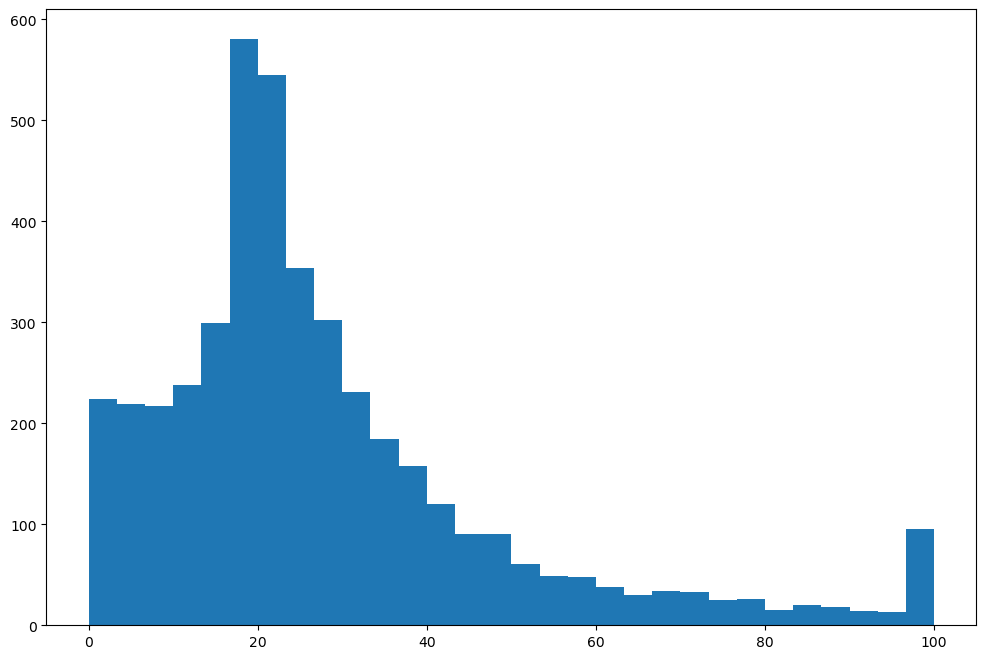

In [143]:
plt.figure(figsize=(12, 8))
plt.hist(customer_w['Score'], bins=30 )
plt.show()